### Analysis software development 

Goal: establish smooth reading of the binary DAQ datafiles

In [14]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
import numpy as np
# import data handling class
from DT5550 import *

Filename to process

Open a datafile and read the data

In [15]:
#
# open the datfile
#
#io = DT5550(file='../../data/20211213_103444/data_20211213_103444_0.raw')
io = DT5550(indir='../../data/20211214_115511/')
#io = DT5550(file='../../DT5550_DAQ/daq/ReadoutClient/test0.raw')


t0 = []
t1 = []
E0 = []
E1 = []
for file in io.filenames:
    io.open_data(file)
    while io.read_event() == 0:
        if io.n_event%100000 == 0:
            print('Processed ',io.n_event,' events')
            
        if io.valid.sum() == 4:
            esum = 0
            nsum = 0
            tav  = 0
            tlist = []
            for idet in range(N_DETECTOR):
                E = io.Q[idet]
                if io.valid[idet]:
                    if (E>1100) and (E<1350):
                        isel = idet
                        tsel = io.t[idet]
                    else:
                        esum = esum + io.Q[idet]
                        tlist.append(io.t[idet])
                        nsum = nsum + 1
        
            if nsum==3:
                tlist = np.array(tlist)
                tav = tlist.mean()
                tstd = np.sqrt(tlist.var())
                E1.append(tstd)
                #print(tstd)
                if tstd<100 and tsel<tav and esum>800 and esum<1200:
                    E0.append(esum)
                    t0.append(tsel)
                    t1.append(tav)

t0 = np.array(t0)
t1 = np.array(t1)
E0 = np.array(E0)
E1 = np.array(E1)
print('Processing done')

DT5550:: Data recorded with config:  ../../data/20211214_115511\config_20211214_115511.json
DT5550:: Open data file: ../../data/20211214_115511\data_20211214_115511_0.raw
Processed  100000  events
DT5550:: Open data file: ../../data/20211214_115511\data_20211214_115511_1.raw
Processed  200000  events
DT5550:: Open data file: ../../data/20211214_115511\data_20211214_115511_10.raw
Processed  300000  events
DT5550:: Open data file: ../../data/20211214_115511\data_20211214_115511_11.raw
Processed  400000  events
DT5550:: Open data file: ../../data/20211214_115511\data_20211214_115511_12.raw
Processed  500000  events
DT5550:: Open data file: ../../data/20211214_115511\data_20211214_115511_13.raw
Processed  600000  events
DT5550:: Open data file: ../../data/20211214_115511\data_20211214_115511_14.raw
Processed  700000  events
DT5550:: Open data file: ../../data/20211214_115511\data_20211214_115511_15.raw
Processed  800000  events
DT5550:: Open data file: ../../data/20211214_115511\data_20211

A few basic plots: integrated charge and time

KeyboardInterrupt: 

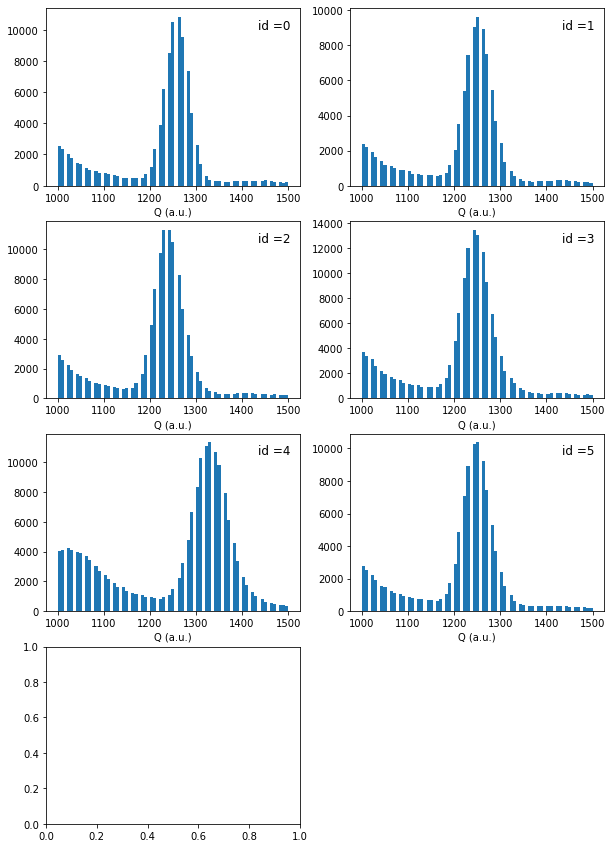

In [16]:
io.plot_all(type="charge",bins=75,logy=False, range=(1000,1500))

In [ ]:
io.plot_all(type="time",range=(600,700),bins=100,logy=True)

In [ ]:
dt = (t0-t1)*12.5/16
h = plt.hist(dt,bins=20,range=(-20,20))

In [ ]:
dt[abs(dt)<10].mean()

In [ ]:
np.sqrt(dt[abs(dt-2.64)<10].var())/np.sqrt(2)

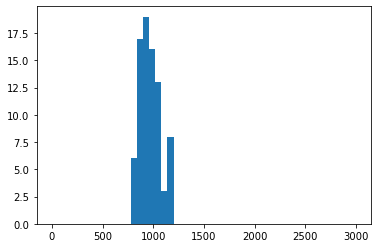

In [17]:
h= plt.hist(E0,bins=50,range=(0,3000))

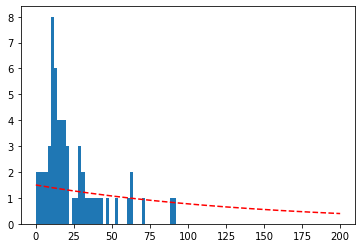

In [19]:
h=plt.hist((t1-t0)*12.5/16,bins=50,range=(0,100))
xx= np.arange(0,200,0.1)
yy= 1.5*np.exp(-xx/150)
plt.plot(xx,yy,'--',color='red')

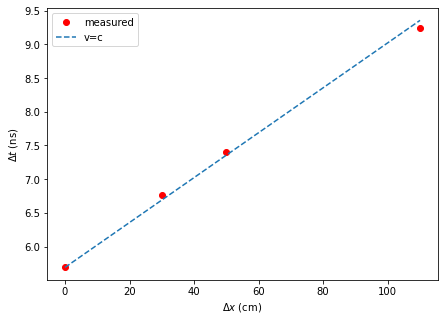

In [10]:
#
# speed of light measurement with Na22 source
#
y0=5.69
plt.figure(figsize=(7,5))
plt.plot([0,30,50,110],[5.69, 6.77, 7.40, 9.24],'o',color='red',label='measured')
plt.plot([0,110],[y0,y0+110/30],'--',label='v=c')
plt.legend()
plt.xlabel('$\Delta x$ (cm)')
plt.ylabel('$\Delta t$ (ns)')
plt.savefig('lightspeed.pdf')

In [ ]:
io.valid